# 坐标系变换

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib mpl
%matplotlib widget

## 关键信息

+ 坐标轴
+ 旋转方向，涉及到左手右手定义。
+ 视角方向
+ 矩阵左乘右乘

### 坐标轴

3D坐标轴，每个轴的朝向都有意义。首先固定两个轴，那么第三个轴的方向朝向哪里呢？

可以根据右手定则或者左手定则进行确定。要点有两个：

条件：确定xy轴，xy顺序为书写顺序，书序不同，则结果也不同。
+ 逆时针为正方向。
+ 穿轴。固定xy轴，顺序为xy，从第一个轴x的正方向，穿过第二个轴y的正方向，大拇指指向为第三个轴的正方向。

### 旋转方向

origin: [0, 0, 0]  
base_coor_x: [1 0 0]


/tmp/ipykernel_1868/2154261660.py:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


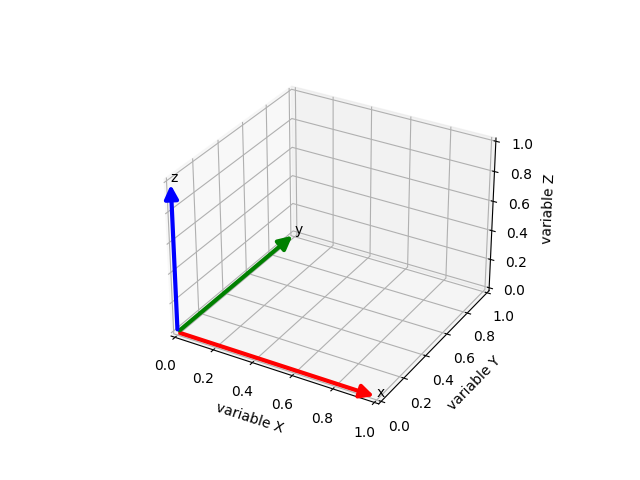

In [2]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
 
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

base_coor = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
origin = [0, 0, 0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print(f'origin: {origin}  \nbase_coor_x: {base_coor[0, :]}')

colors = 'rgb'
texts = ['x', 'y', 'z']
for i in range(base_coor.shape[1]):
    # a = Arrow3D(base_coor[:, 0], base_coor[:, 1], base_coor[:, 2], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    a = Arrow3D([origin[0], base_coor[i, 0]], [origin[1], base_coor[i, 1]], [origin[2], base_coor[i, 2]], mutation_scale=20, lw=3, arrowstyle="-|>", color=colors[i])
    ax.add_artist(a)

    ax.text3D(base_coor[i, 0], base_coor[i, 1], base_coor[i, 2], texts[i])

ax.set_xlabel('variable X')
ax.set_ylabel('variable Y')
ax.set_zlabel('variable Z')

plt.show()

如上图所示，是一个右手定则的坐标系。如果要获取左手定则坐标系，则对base_coor调整为：$base\_coor = [[1, 0, 0], [0, 1, 0], [0, 0, -1]]$。
> 右手定则绕z轴旋转$\theta$角度:
> 1. 正对着z轴，即看着z轴正方向。
> 2. 此时右手手指旋转方向是逆时针方向，逆时针旋转为正方向，绕z轴旋转$\theta$角度，即逆时针旋转$\theta$。

如果是一个右手定则的坐标系，绕z轴旋转$\theta$角度：
> 左手定则绕z轴旋转$\theta$角度：
> 1. 正对着z轴，即看着z轴正方向。
> 2. 此时左手手指旋转方向是顺时针方向，与正方向逆时针方向相反，绕z轴旋转$\theta$角度，即逆时针旋转$\theta$，也就是左手手指顺时针旋转$-\theta$角度。

建议：右手比计划下，一定要记住正对着旋转轴方向。

### 视角方向

视角方向是相对相机坐标系来讲的，即相机拍到画面是相机的深度轴的方向。一般情况下，相机坐标系按照右手定则，水平方向为x轴(pitch)，向右为正方向，也叫俯仰角，垂直方向为y轴，向上为正方向，也叫偏航角，右手定则下，**相机视角方向为z轴的负半轴**。这点与opencv不同，opencv也是右手定则，原因是opencv的图像坐标系中y轴是垂直向下的。

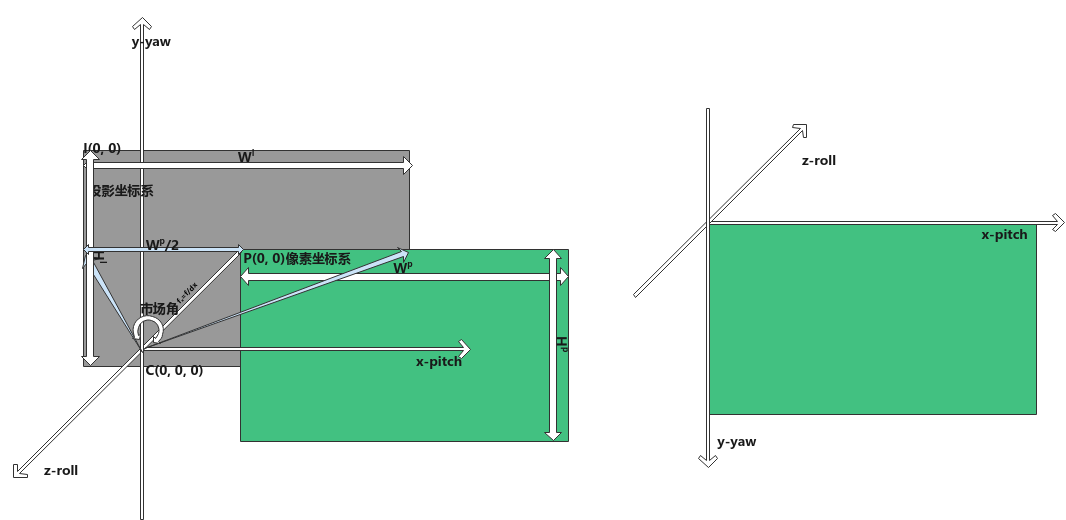

### 矩阵左乘右乘

## 坐标系转换

坐标系转换重点在确定两个坐标系，轴，轴上的基向量。

几种常见的坐标轴转换：
+ 坐标轴对换
+ 右手定则左手定则坐标系相互转换
+ 世界坐标系与相机坐标系相互转换
+ 相机坐标系与像素坐标系相互转换
+ 


### 坐标轴对换

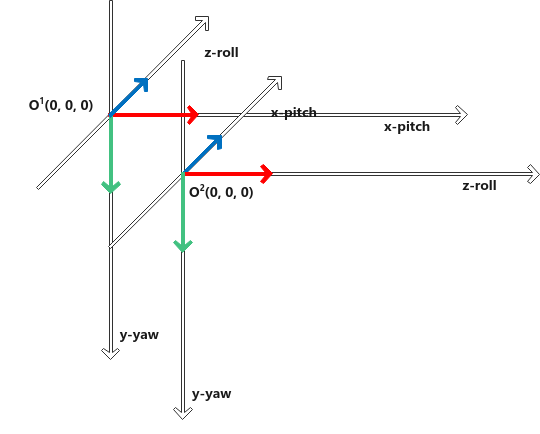

如上图所示，$O^1$和$O^2$两个坐标系，将其中x和z轴对换。要求将$O^1$坐标系转换为$O^2$坐标系。

> 坐标系转换，最好从基向量出发考虑问题。
 

>> 首先定点目标坐标系$O^2$上的基向量：$$base\_coor^{O^2} = \left[ \begin{matrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$
>> 其次，假定$O^1$和$O^2$原点重合，确定$base\_coor^{O^2}$坐标对应在$O^1$中的坐标：$$base\_coor^{O^2}_{O^1} = \left[ \begin{matrix} 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$
>> 考虑$O^1$和$O^2$原点，$O^2(0, 0, 0)$在$O^1$坐标系下为: $O^2(0, 0, 0)  -->  O^1(u_0, v_0, w_0)$。
>> 则讲平移向量与R矩阵合并，此时转换矩阵就成了：$$base\_coor^{O^2}_{O^1} = \left[ \begin{matrix} 0 & 0 & 1 & u_0 \\ 0 & 1 & 0 & v_0 \\ 1 & 0 & 0 & w_0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$

尝试下，把$O^1(0, 0, 1)$点转换的$O^2$坐标系中是多少？

$\left[ \begin{matrix} 0 & 0 & 1 & u_0 \\ 0 & 1 & 0 & v_0 \\ 1 & 0 & 0 & w_0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$ @ $\left[ \begin{matrix} 0 \\ 0 \\ 1 \\ 1 \end{matrix} \right]$ = $\left[ \begin{matrix} u_0+1 \\ v_0 \\ w_0 \\ 1 \end{matrix} \right]$ = $\left[ \begin{matrix} u_0 \\ v_0 \\ w_0 \\ 0 \end{matrix} \right]$ + $\left[ \begin{matrix} 1 \\ 0 \\ 0 \\ 1 \end{matrix} \right]$
如果去掉原点之间的平移矩阵，就成了$(1, 0, 0)$，此时就将$O^1$坐标系的x和z轴对换，并且进行了平移，成了$O^2$坐标系。

### 右手定则左手定则坐标系相互转换

上个例子坐标轴对换就是从右手定则坐标系$O^1$转换到左手定则坐标系$O^2$。

### 世界坐标系与相机坐标系相互转换

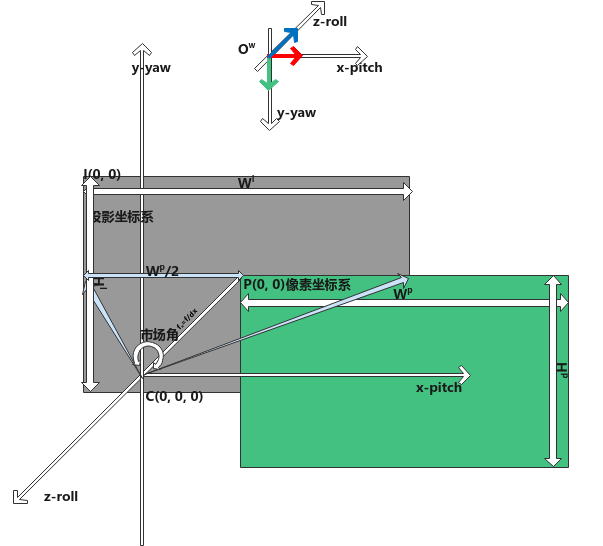

世界坐标系$O^w$转换到相机坐标系$O^c$，步骤相似：

>> 首先定点目标坐标系$O^c$上的基向量：$$base\_coor^{O^c} = \left[ \begin{matrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$
>> 其次，假定$O^w$和$O^c$原点重合，确定$base\_coor^{O^c}$坐标对应在$O^w$中的坐标：$$base\_coor^{O^c}_{O^w} = \left[ \begin{matrix} 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$
>> 考虑$O^w$和$O^c$原点，$O^c(0, 0, 0)$在$O^w$坐标系下为: $O^c(0, 0, 0)  -->  O^w(u_0, v_0, w_0)$。
>> 则讲平移向量与R矩阵合并，此时转换矩阵就成了：$$base\_coor^{O^c}_{O^w} = \left[ \begin{matrix} 0 & 0 & 1 & u_0 \\ 0 & 1 & 0 & v_0 \\ 1 & 0 & 0 & w_0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$

尝试下，把$O^w(0, 0, 1)$点转换的$O^c$坐标系中是多少？

$\left[ \begin{matrix} 0 & 0 & 1 & u_0 \\ 0 & 1 & 0 & v_0 \\ 1 & 0 & 0 & w_0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$ @ $\left[ \begin{matrix} 0 \\ 0 \\ 1 \\ 1 \end{matrix} \right]$ = $\left[ \begin{matrix} u_0+1 \\ v_0 \\ w_0 \\ 1 \end{matrix} \right]$ = $\left[ \begin{matrix} u_0 \\ v_0 \\ w_0 \\ 0 \end{matrix} \right]$ + $\left[ \begin{matrix} 1 \\ 0 \\ 0 \\ 1 \end{matrix} \right]$
如果去掉原点之间的平移矩阵，就成了$(1, 0, 0)$，此时就将$O^c$坐标系的x和z轴对换，并且进行了平移，成了$O^w$坐标系。

上述转换过程仅仅依赖了基向量，有时候给出的的是旋转角，即在xyz轴上的旋转角度$(pitch, yaw, roll)$，此时R矩阵比较容易：
> 1. 首先**确定相机的坐标系的右手定则(也可以是左手定则)**，一般都采用右手定则；
>
> 2. 此时旋转矩阵R-xyz为：$$R_x = \left[ \begin{matrix} 1 & 0 & 0 & 0 \\ 0 & cos(\theta) & -sin(\theta) & 0 \\ 0 & sin(\theta) & cos(\theta) & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$
>
> $$R_y = \left[ \begin{matrix} cons(\theta) & 0 & sin(\theta) & 0 \\ 0 & 1 & 0 & 0 \\ -sin(\theta) & 0 & cos(\theta) & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$
>
> $$R_z = \left[ \begin{matrix} cons(\theta) & sin(\theta) & 0 & 0 \\ -sin(\theta) & cos(\theta) & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{matrix} \right]$$
>
> 3. 如果**旋转顺序为xyz**，此时旋转矩阵为$R=R_x @ R_y @ R_z$。
>
> 4. 平移矩阵T则是$O^c$原点在$O^w$坐标系的坐标位置。
> 相机坐标系原点$p^c_0 = p^w_i = \{x^w_i, y^w_i, z^w_i\}$，世界坐标系原点$p^w_0$，在世界坐标系内，将$p^w_0$旋转平移到$p^w_i$，而$p^c_0 = p^w_i$，因此这个过程就是世界坐标系转换为相机坐标系的过程。即$R @ p^w_0 + T = p^w_i = p^c_0$ ==> $T = p^w_i$
>
> 因此$RT = \left[ \begin{matrix} R & T \\ 0 & 1 \end{matrix} \right]$

>> 这里有个小技巧：到底是正还是负，这个符号要用到左手右手定则，根据旋转方向，进行坐标轴上的向量分解，看分配到各个轴上的分量是正还是负，如绕x轴旋转，则y轴向量分解，如果分解到了某个轴的负轴上去，那么符号就是负，如果分解到了某个轴的正轴上去，那么符号就是正。
>>
>> 还有另外一种方式，就是用icos($\theta$ + $\beta$) + sin($\theta$ + $\beta$)，进行分解。
>>
>> 这里还有个问题，就是手指方向是按照xyzxyz...这样循环方式进行的，即绕x轴旋转，手指的方向是从y到z，绕y轴旋转，手指的方向是从z到z，绕z轴旋转，手指的方向是从x到y。

## 坐标系转换

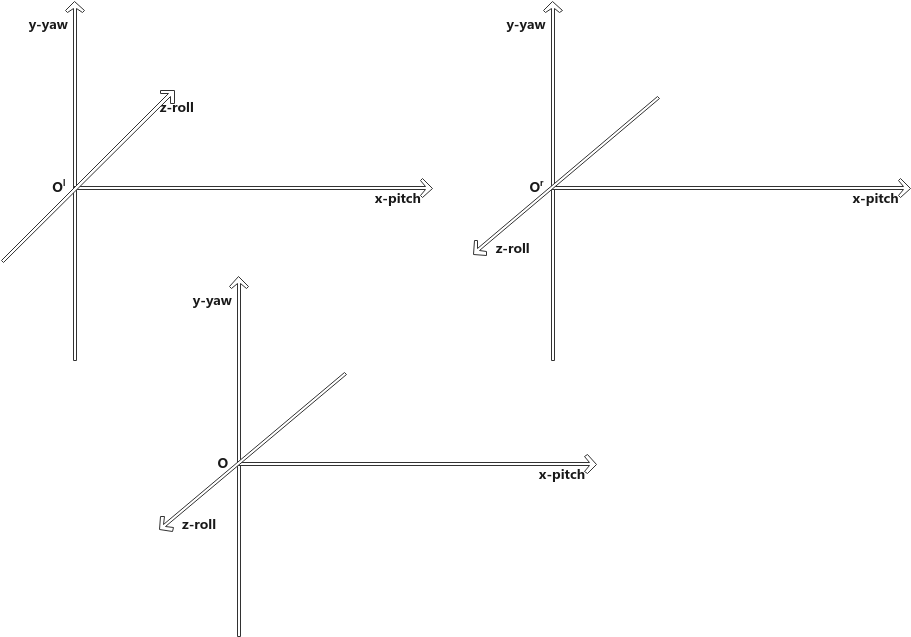

$O^l$为左手坐标系，$O^r$为右手坐标系，$O$为基础坐标系。

$O^l$表示$O^l$经过$R_O^{O^l}(\theta_x,\theta_y,\theta_z)$和$T_O^{O^l}$坐标轴旋转变换和平移变换。

$O^r$表示$O^r$经过$R_O^{O^r}(\theta_x,\theta_y,\theta_z)$和$T_O^{O^r}$坐标轴旋转变换和平移变换。

$P_{ts}^O$表示$O$坐标系下的点空间的一个点集。

注：
+ 一定要清晰表示坐标系。
+ 一定要清晰表示点和点所在坐标系。
+ 一定要清晰表示坐标系的基和基所在的坐标系，可以将基理解为视角。

如：坐标系表示$O$，$O^l$，$O^r$；点$P_{O}^{O}$，$P_{O^l}^{O^l}$；基$I_{O}^{O}$，$I_{O}^{O^r}$，$I_{O^r}^{O^r}$，$I_(O)^(O)$表示$O$坐标系下$O$的基$I_{O}^{O}=\left[ \begin{matrix} 1 & 0 & 0 \\ 0 & 1 & 0\\ 0 & 0 & 1 \end{matrix} \right]$，$I_{O}^{O^r}$表示$O$坐标系下$O^r$坐标系的基$I_{O}^{O^r}=R_{O}^{O^r} @ I_{O}^{O}$。

### 点集$P_{ts}^O$在$O^r$坐标系中如何表示？

点集在坐标系之间的表示：
+ 首先确定好坐标系和点；
+ 再确定好视角；
+ 再进行视角切换计算。

坐标系为$O$和$O^r$，点集为$P_{O}^O$，在$O$坐标系的视角下，表示为$P_{O}^O = I_{O}^{O} @ P_{O}^O$，在$O^r$坐标系视角下，表示为$P_{O^r}^{O^r} = I_{O^r}^{O^r} @ P_{O^r}^{O^r}$，坐标系$O_{O^r}^{O^r}$的基$I_{O^r}^{O^r}$在坐标系$O$中的表示为$I_{O}^{O^r} = R @ I_{O}^{O}$，那么点$P_{O}^O$在$O^r$坐标系下如何表示呢？

从坐标系$O$中看点$P_{O}^{O}$，表示为$I_{O}^{O} @ P_{O}^{O}$，同样在坐标系$O$中，通过视角为坐标系$O_{O^r}^{O^r}$看$P_{O}^{O}$，应该怎么表达呢？$P_{O}^{O} = I_{O}^{O^r} @ I_{O^r}^{O^r} @ P_{O^r}^{O^r} = R @ I_{O}^{O} @ I_{O^r}^{O^r} @ P_{O^r}^{O^r} = R @ P_{O^r}^{O^r}$

### $O^l$在$O^r$中的表示？

In [28]:
import numpy as np

rot_xy = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])
rot_xz = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0]
])

a = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

b_xy = rot_xy @ a   
print(f'b_xy: {b_xy}')

b_xz = rot_xz @ a
print(f'b_xz: {b_xz}')

b_xy: [[4 5 6]
 [1 2 3]
 [7 8 9]]
b_xz: [[7 8 9]
 [4 5 6]
 [1 2 3]]


In [29]:
tt1 = np.array([[-1, 0, 0, 0],[0, 1, 0, 0],[0, 0, 1, 0], [0, 0, 0, 1]])
tt2 = np.array([[0, 0, 1, 0],[1, 0, 0, 0],[0, 1, 0, 0], [0, 0, 0, 1]])

In [30]:
tt1 @ tt2

array([[ 0,  0, -1,  0],
       [ 1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  0,  1]])

In [31]:
tt2 @ tt1

array([[ 0,  0,  1,  0],
       [-1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  0,  1]])

In [32]:
np.linalg.inv(tt2 @ tt1)

array([[-0., -1., -0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [36]:
np.linalg.inv(tt1) @ np.linalg.inv(tt2)

array([[ 0., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [34]:
np.linalg.inv(tt2)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [35]:
np.linalg.inv(tt1)

array([[-1., -0., -0., -0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [44]:
a1 = np.array([
    [0,1,0],
    [0,0,-1],
    [1, 0,0]
]) # column
a2 = np.array([
    [0, 0, 1],
    [1, 0,0],
    [0,-1,0]
]) # row

b1 = np.array([1,0,0]).reshape((1, 3))
b2 = np.array([0,1,0]).reshape((1, 3))

np.linalg.inv(a2) @ b2.T
b2 @ np.linalg.inv(a1)

array([[ 0,  0, -1]])

eig_val: [1. 1. 1.]  eig_vec: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
mean_x: 0.5164659575868177  v[0]: 1.0  mean_y: 0.6442215413815643  v[1]: 0.0  mean_z: 0.6055532685144428  v[2]: 0.0
mean_x: 0.5164659575868177  v[0]: 0.0  mean_y: 0.6442215413815643  v[1]: 1.0  mean_z: 0.6055532685144428  v[2]: 0.0
mean_x: 0.5164659575868177  v[0]: 0.0  mean_y: 0.6442215413815643  v[1]: 0.0  mean_z: 0.6055532685144428  v[2]: 1.0


/tmp/ipykernel_19303/1532836896.py:14: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


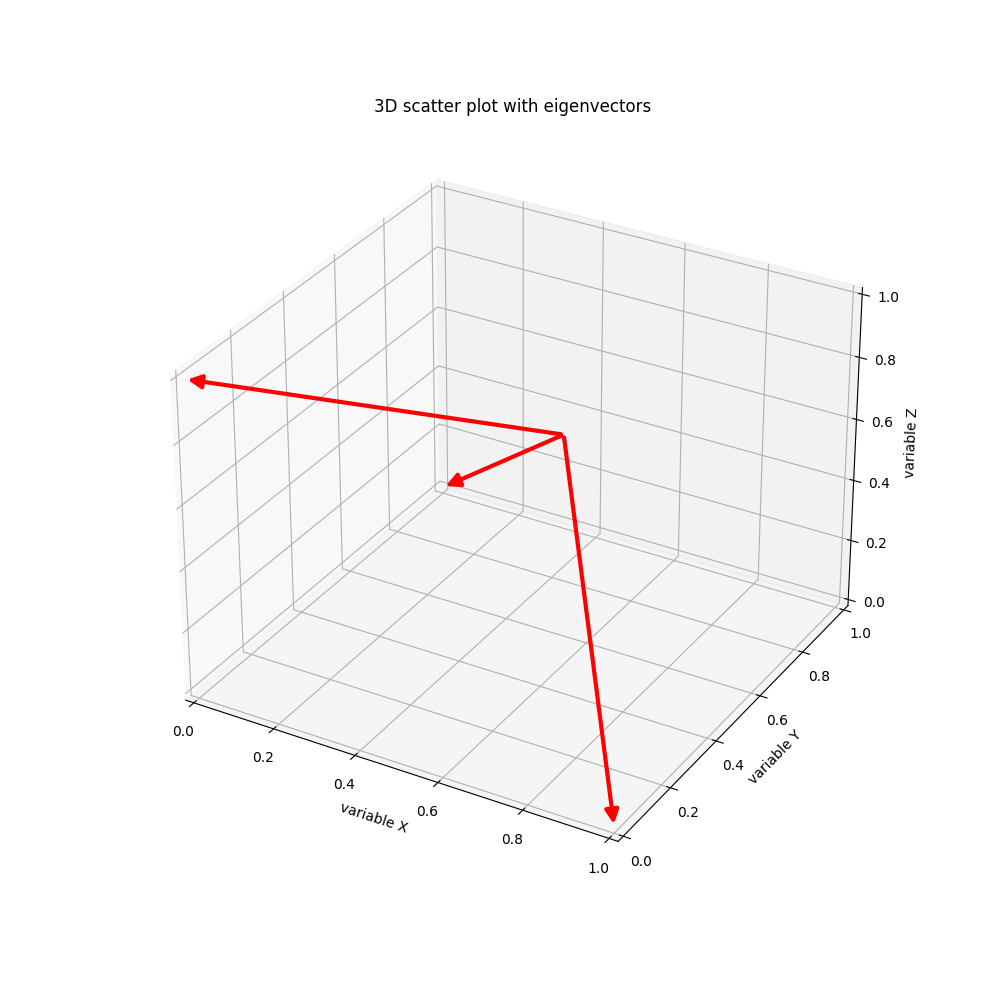

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
 
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


# 生成示例数据
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
 
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
 
# 为PCA合并数据
samples = np.concatenate((class1_sample, class2_sample), axis=0)
 
# 求平均值
mean_x = np.mean(samples[:,0])
mean_y = np.mean(samples[:,1])
mean_z = np.mean(samples[:,2])
 
# 特征向量和特征值
eig_val, eig_vec = np.linalg.eig(cov_mat1)
print(f'eig_val: {eig_val}  eig_vec: {eig_vec}')
################################
# 绘制特征向量
################################
 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
 
# ax.plot(samples[:,0], samples[:,1], samples[:,2], 'o', markersize=10, color='green', alpha=0.2)
# ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec.T:
    print(f'mean_x: {mean_x}  v[0]: {v[0]}  mean_y: {mean_y}  v[1]: {v[1]}  mean_z: {mean_z}  v[2]: {v[2]}')
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]],
                [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('variable X')
ax.set_ylabel('variable Y')
ax.set_zlabel('variable Z')
 
plt.title('3D scatter plot with eigenvectors')
 
plt.show()